In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from skmultilearn.adapt import MLkNN
import sklearn.metrics as metrics
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
import os

2024-04-29 15:16:03.595954: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 15:16:03.595987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 15:16:03.597004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 15:16:03.602715: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 15:16:04.240501: W tensorflow/comp

In [3]:
d2= pd.read_csv('/home/yadagiri/updated dataset.csv')

In [4]:
d2

,id,Category,text,Vocabulary,Noun Count,Verb Count,AUX Count,NUM Count,PRON Count,ADV Count,INTJ Count,PART Count,label
0,articles-cleaned-truncated/news-2021-01-01-202...,Human,Inaugural Address by President Joseph R. Biden...,338,127,104,16,6,62,31,0,2,0
1,articles-cleaned-truncated/news-2021-01-01-202...,Human,Fact check: Biden inauguration impacted by pan...,228,99,58,10,6,8,20,0,0,0
2,articles-cleaned-truncated/news-2021-01-01-202...,Human,Highlights from Joe Biden's 2021 inauguration\...,295,107,79,0,15,27,27,0,1,0
3,articles-cleaned-truncated/news-2021-01-01-202...,Human,"Biden takes the helm, appeals for unity to tak...",331,129,102,3,7,21,26,0,2,0
4,articles-cleaned-truncated/news-2021-01-01-202...,Human,'The Hill We Climb': Read Amanda Gorman's inau...,385,125,146,30,7,103,54,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,'The Disappearance of Gabby Petito' – A Compre...,198,91,65,3,7,27,3,0,2,1
15186,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,"Utah State Police Search for Gabby Petito, Tra...",91,52,46,0,13,10,2,0,1,1
15187,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,McKenna's Lost Friend: Debunking the Evidence ...,132,87,101,1,3,47,9,0,6,1
15188,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,"""Gunshots Found in Florida Nature Preserve: A ...",115,101,67,5,0,12,10,0,1,1


In [5]:
print(d2.shape)

(15190, 13)


In [6]:
print(d2.isnull().sum())

id            0
Category      0
text          0
Vocabulary    0
Noun Count    0
Verb Count    0
AUX Count     0
NUM Count     0
PRON Count    0
ADV Count     0
INTJ Count    0
PART Count    0
label         0
dtype: int64


In [7]:
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [8]:
X = list(d2['text'])
#y = np.asarray(d1[d1.columns[1:]])
y_data = d2[d2.columns[12:13]]
y = y_data.values

In [9]:
#Model CNN & Bi-LSTM
import keras
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM
# from keras.layers.recurrent import LSTM
# from keras.layers.core import Activation, Dropout, Dense
from keras.layers import LSTM, Activation, Dropout, Dense, Flatten, Bidirectional, GRU, concatenate, SpatialDropout1D

from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from keras.optimizers import Adam,SGD,RMSprop
from keras.losses import MeanSquaredError
######## Textual Features for Embedding ###################
max_len = 100
# max_features = 10000
max_features = 4479
embed_size = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post', maxlen=max_len)

In [10]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [11]:
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

/home/yadagiri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 1, 1, 1])

In [12]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/home/yadagiri/glove.6B.300d.txt', encoding="utf8") ## using pre-trained or self-trained embeddings ##

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)

embedding_matrix = zeros((num_words, embed_size)) ## has to be similar to glove dimension ##
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Load your data, assuming you have a DataFrame 'df' with 'text' and 'label' columns
# Ensure that the 'label' column contains 'neither,' 'racist,' or 'sexist'

# Split your data into features (X) and labels (y)
# X = d2['text'].values
# y = d2['label'].values

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store classification reports for each fold
classification_reports = []
# Initialize lists to store metrics for each fold
precision_list = []
recall_list = []
f1_score_list = []

# # Define the maximum number of words to consider in the text
# max_words = 10000

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
# tokenizer.fit_on_texts(X)

# # Convert text data to sequences
# X_sequences = tokenizer.texts_to_sequences(X)

# # Define the maximum sequence length (adjust as needed)
# max_sequence_length = 100

# Convert labels to categorical (one-hot encoding)
# y_encoded = to_categorical(y, num_classes=3)

# Iterate through the folds
# import pdb;pdb.set_trace()
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Define the model architecture
    sequence_input = Input(shape=(max_len, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)
    x = SpatialDropout1D(0.2)(x) ## ostly drops the entire 1D feature map rather than individual elements.
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    # x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    #x = Conv1D(16, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model = Model(sequence_input, preds)
    # model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['acc'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     model = Sequential()
#     model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
#     model.add(SpatialDropout1D(0.2))
#     model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1)))
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(3, activation="softmax"))

#     # Compile the model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    epochs = 3
    batch_size = 128
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model on the validation data
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

#     # Generate and store the classification report for this fold
#     report = classification_report(y_val_labels, y_pred_labels, target_names=['neither', 'racist', 'sexist'])
#     classification_reports.append(report)

#     print(f'Fold {fold + 1} - Classification Report:\n{report}\n')

# # Print the average classification report across all folds
# average_report = '\n'.join(classification_reports)
# print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')
     # Generate the classification report for this fold
    report = classification_report(y_val_labels, y_pred_labels, target_names=['Human', 'AI'], output_dict=True)

    # Extract precision, recall, and f1-score
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Human", "AI"])}\n')

# Calculate the average precision, recall, and f1-score across all folds
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

# Display the average classification report
average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

2024-04-29 15:16:28.748758: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-29 15:16:28.748784: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: nits-lab
2024-04-29 15:16:28.748791: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: nits-lab
2024-04-29 15:16:28.748947: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.171.4
2024-04-29 15:16:28.748969: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.171.4
2024-04-29 15:16:28.748973: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.171.4


Epoch 1/3
95/95 [==============================] - 18s 146ms/step - loss: 0.2273 - accuracy: 0.9233 - val_loss: 0.1909 - val_accuracy: 0.9273
Epoch 2/3
95/95 [==============================] - 13s 140ms/step - loss: 0.1704 - accuracy: 0.9320 - val_loss: 0.1617 - val_accuracy: 0.9332
Epoch 3/3
95/95 [==============================] - 2s 19ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

       Human       0.68      0.24      0.35       220
          AI       0.94      0.99      0.97      2818

    accuracy                           0.94      3038
   macro avg       0.81      0.61      0.66      3038
weighted avg       0.92      0.94      0.92      3038


Epoch 1/3
95/95 [==============================] - 17s 145ms/step - loss: 0.2219 - accuracy: 0.9250 - val_loss: 0.1786 - val_accuracy: 0.9345
Epoch 2/3
95/95 [==============================] - 14s 143ms/step - loss: 0.1734 - accuracy: 0.9297 - val_loss: 0.1567 - val_accuracy: 0.9332
Epoch 3/

save the model

In [15]:
# Save the model in the native Keras format
model.save('/home/yadagiri/my_model.keras')


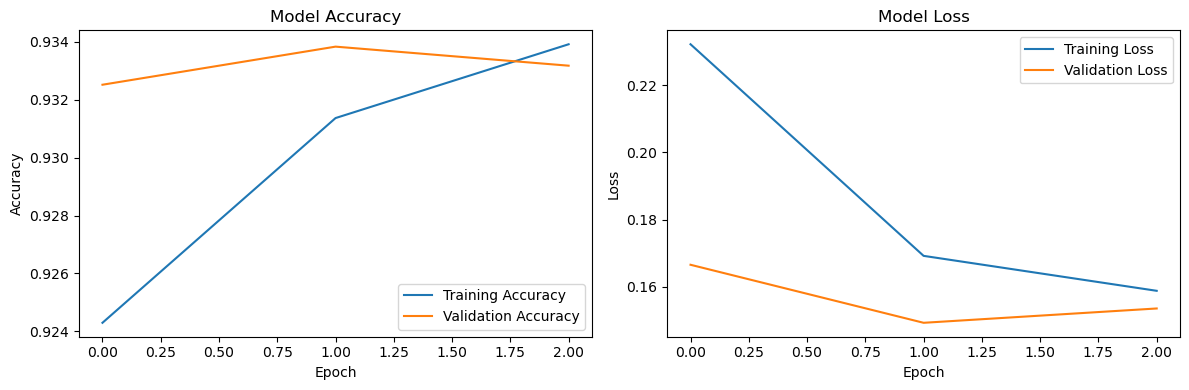

In [16]:
# Assuming you have trained your model and have a `history` object
# after fitting the model

import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
tf.keras.models.load_model('/home/yadagiri/my_model.keras')

In [19]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('/home/yadagiri/my_model.keras')

# Verify the loaded model
print(loaded_model.summary())


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 100, 300)          1343700   
                                                                 
 spatial_dropout1d_4 (Spati  (None, 100, 300)          0         
 alDropout1D)                                                    
                                                                 
 conv1d_4 (Conv1D)           (None, 99, 64)            38464     
                                                                 
 bidirectional_4 (Bidirecti  (None, 99, 256)           197632    
 onal)                                                           
                                                                 
 global_average_pooling1d_4  (None, 256)               0   

In [20]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Assuming you have `y_val_labels` and `y_pred_labels` as the true and predicted labels

# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels, y_pred_labels, average='weighted')
precision = precision_score(y_val_labels, y_pred_labels, average='weighted')
recall = recall_score(y_val_labels, y_pred_labels, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)

F1 Score: 0.9249486768837138
Precision: 0.9215880208085895
Recall: 0.9331797235023042
{'Human': {'precision': 0.5625, 'recall': 0.3287671232876712, 'f1-score': 0.414985590778098, 'support': 219.0}, 'AI': {'precision': 0.9494845360824742, 'recall': 0.9801347995743172, 'f1-score': 0.9645662419270378, 'support': 2819.0}, 'accuracy': 0.9331797235023042, 'macro avg': {'precision': 0.7559922680412371, 'recall': 0.6544509614309941, 'f1-score': 0.6897759163525679, 'support': 3038.0}, 'weighted avg': {'precision': 0.9215880208085895, 'recall': 0.9331797235023042, 'f1-score': 0.9249486768837138, 'support': 3038.0}}


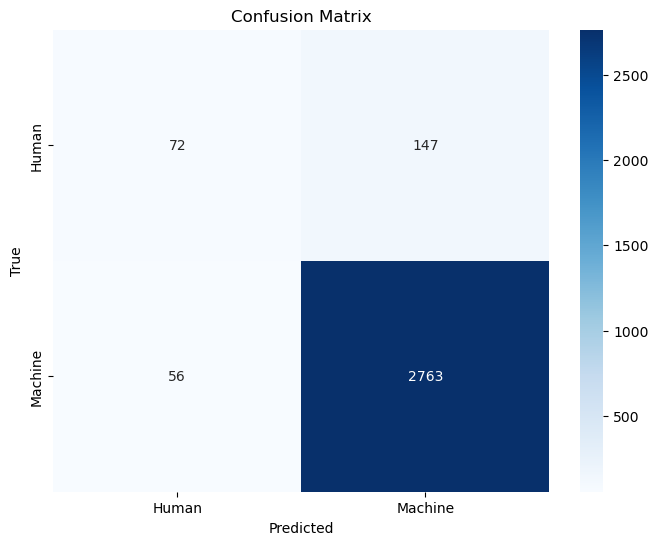

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true = true_labels
# y_pred = predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human','Machine'],
            yticklabels=['Human','Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
df= pd.read_csv('/home/yadagiri/kaggletestdata.csv')

In [23]:
df

,S.no,input,output
0,0,California is the biggest example of city plan...,1
1,1,A life without cars sure sounds like a great i...,0
2,2,Cars are used used in everyday life but they m...,0
3,3,The electoral collage should be disbanded. Not...,0
4,4,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...,...
2489,2489,"Dear Florida senator, It is in the interest of...",0
2490,2490,Driving can be a huge hassle. Having to spend ...,0
2491,2491,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,2492,"The electoral college is pointless, I believe ...",0


In [24]:
df = df.rename(columns={'input': 'text'})

In [25]:
######## Textual Features for Embedding ###################

sequence = tokenizer.texts_to_sequences(df.text)
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)

In [26]:
sequence = tokenizer.texts_to_sequences(df['text']) # same tokenizer which is used on train data.
sequence = pad_sequences(sequence,padding='post', maxlen = max_len)

predictions = model.predict(sequence)
classes=np.argmax(predictions,axis=1)

78/78 [==============================] - 1s 18ms/step


In [27]:
predictions

array([[0.33195564, 0.6680444 ],
       [0.29971334, 0.7002867 ],
       [0.73517114, 0.26482883],
       ...,
       [0.6612322 , 0.3387679 ],
       [0.7649733 , 0.23502678],
       [0.21918133, 0.78081864]], dtype=float32)

In [28]:
df= pd.read_csv('/home/yadagiri/kaggletestdata.csv')
y_data = df[df.columns[2:3]]
y = y_data.values
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from keras.utils import to_categorical
y_test_one_hot = to_categorical(y_encoded, num_classes=2)
y_test_one_hot

/home/yadagiri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [29]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to discrete class labels
y_true = np.argmax(y_test_one_hot, axis=1)  # Assuming y_test_one_hot is a NumPy array

# Convert continuous predictions to discrete class labels
y_pred_discrete = np.argmax(predictions, axis=1)  # Assuming y_pred is a NumPy array

# Generate the classification report
report = classification_report(y_true, y_pred_discrete)

# Print the classification report
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.9249486768837138
Precision: 0.9215880208085895
Recall: 0.9331797235023042
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      1375
           1       0.80      0.38      0.51      1119

    accuracy                           0.68      2494
   macro avg       0.73      0.65      0.64      2494
weighted avg       0.72      0.68      0.65      2494



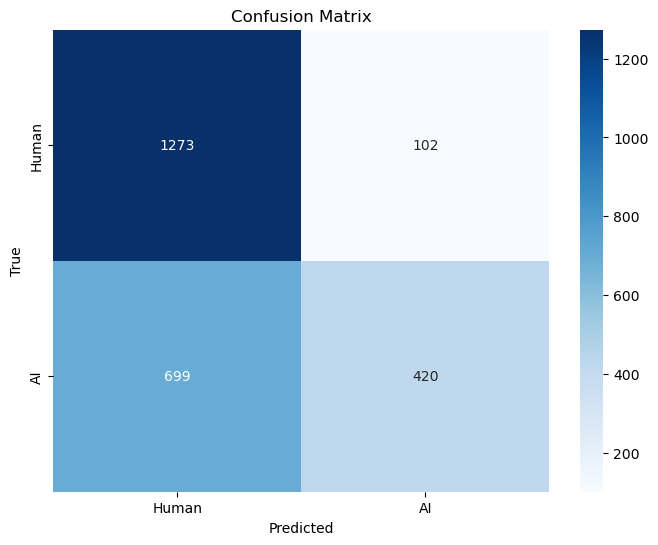

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true = true_labels
# y_pred = predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_discrete)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human','AI'],
            yticklabels=['Human','AI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()